In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kaggle-survey-2022/kaggle_survey_2022_responses.csv
/kaggle/input/kaggle-survey-2022/Supplementary Data/kaggle_survey_2022_methodology.pdf
/kaggle/input/kaggle-survey-2022/Supplementary Data/kaggle_survey_2022_answer_choices.pdf


<span style="font-size:18px;"> Once upon a time... There was a Kaggle Survey in 2022 with a few interesting questions about our profession.Our task is to tell a rich story about the data science community using Kaggle Survey 2022 data.  </span>

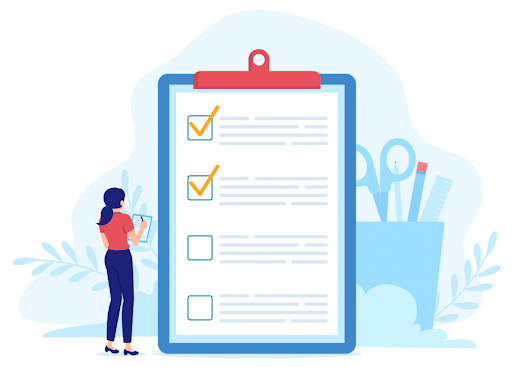

### <font color='289C4E'>Table of contents<font><a class='anchor' id='top'></a>
- [First: let's see the dataset](#1)
- [Let's see how the genders are distributed among the fillers](#2)
- [Student or not student?](#3)
- [How old are we?](#4)
- [Where are the participants from?](#5)
- [What kind of degree do the participants have?](#6)
- [How many years of experience do we have?](#7)

## 🚚 First: let's see the dataset

In [2]:
df = pd.read_csv('../input/kaggle-survey-2022/kaggle_survey_2022_responses.csv')
df.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (0,208,225,255,257,260,270,271,277) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...
1,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
4,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN


In [3]:
df = df.iloc[1: , :]
df

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
1,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
4,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
5,232,45-49,Man,India,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23993,331,22-24,Man,United States of America,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,"Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
23994,330,60-69,Man,United States of America,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN
23995,860,25-29,Man,Turkey,No,NaN,NaN,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN
23996,597,35-39,Woman,Israel,No,NaN,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#import some useful libraries for plotting
import seaborn as sns
from matplotlib import pyplot as plt

## How long did it take to complete the survey?

In [5]:
df['Duration (in seconds)'] = pd.to_numeric(df['Duration (in seconds)'])
duration = df['Duration (in seconds)'].copy()
duration = duration.clip(100,1500) #Trim values at input thresholds because of extreme values

Text(0.5, 1.0, 'Duration of the survey')

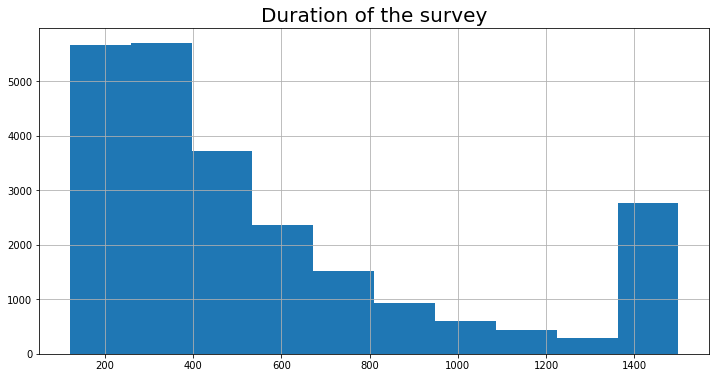

In [6]:
plt.figure(figsize=(12,6))
duration.hist()
plt.title("Duration of the survey", fontsize=20)

<div class="alert alert-block alert-info">
Most of the participants  completed the survey  in a relatively short time. I think there was a few thousand respondents thought more about the questions.
</div>

## Let's see how the genders are distributed among the fillers

Text(0.5, 1.0, 'Gender')

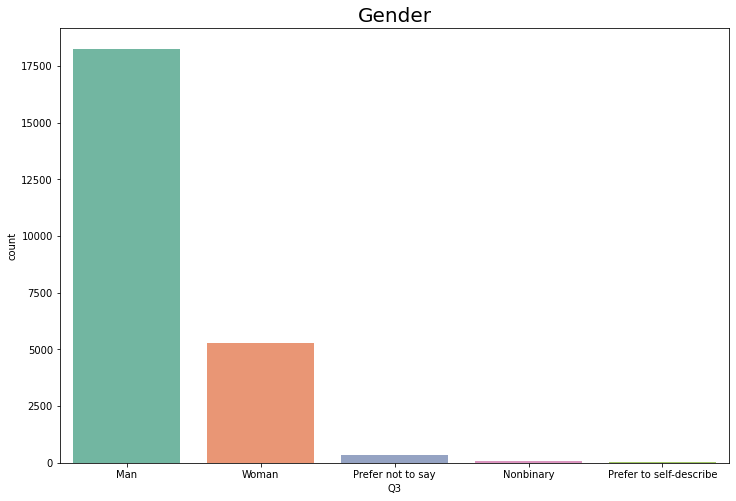

In [7]:
color_palette = sns.color_palette("Set2", 8)
sns.set_palette(color_palette)
plt.figure(figsize=(12,8))
sns.countplot(x=df["Q3"])
plt.title('Gender', fontsize=20)

<div class="alert alert-block alert-info">
As we can see, the majority of those who completed the survey were men.
</div>

## Student or not student?

Text(0.5, 1.0, 'Student or not')

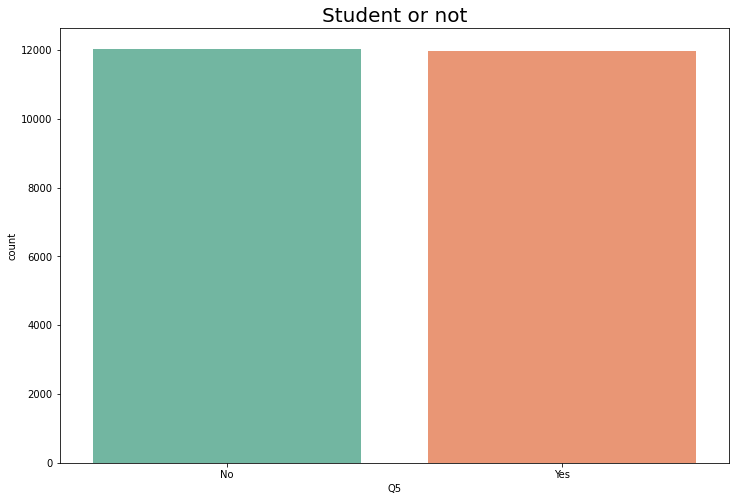

In [8]:
color_palette = sns.color_palette("Set2", 8)
sns.set_palette(color_palette)
plt.figure(figsize=(12,8))
sns.countplot(x=df["Q5"])
plt.title('Student or not', fontsize=20)

<div class="alert alert-block alert-info">
As you can see, students filled out the survey in approximately the same proportion as non-students.
</div>

## How old are we?

Text(0.5, 1.0, 'Age')

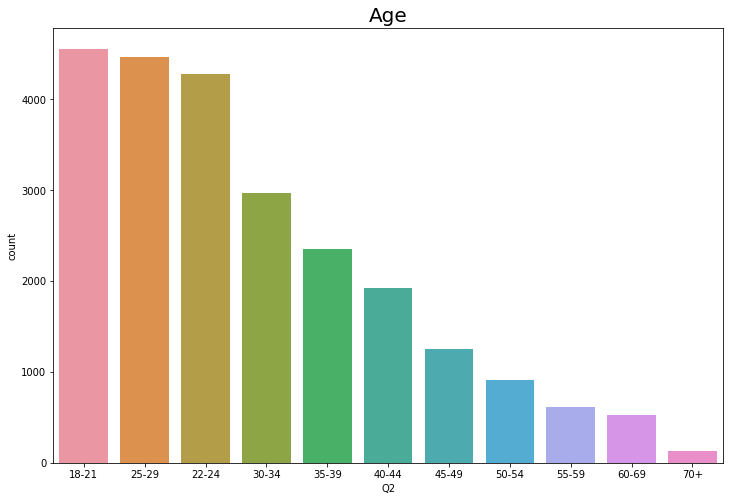

In [9]:
color_palette = sns.color_palette("Set2", 8)
sns.set_palette(color_palette)
plt.figure(figsize=(12,8))
sns.countplot(x=df["Q2"], order = df['Q2'].value_counts().index)
plt.title('Age', fontsize=20)

<div class="alert alert-block alert-info">
Most of the participants are very young. In my opinion, this may be because DS is a young science.</div>

## Where are the participants from?

Text(0.5, 1.0, 'Country')

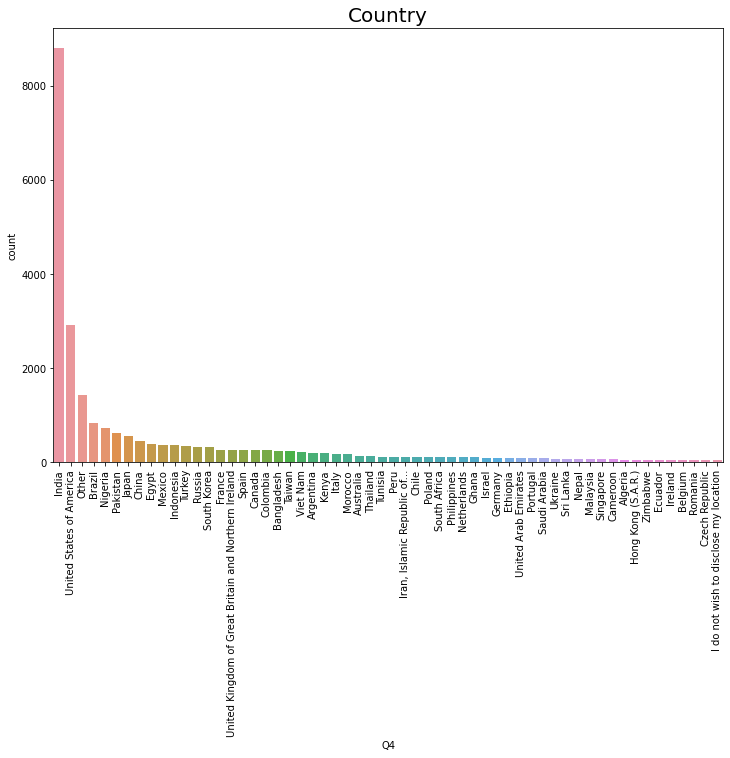

In [10]:
color_palette = sns.color_palette("Set2", 8)
sns.set_palette(color_palette)
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.countplot(x=df["Q4"], order = df['Q4'].value_counts().index)
plt.title('Country', fontsize=20)

<div class="alert alert-block alert-info">
Most of the participants come from India, but let us take a closer look...
</div>


In [11]:
# Creating a new column for separating the countries
df['CountryX'] = ['India' if x=='India' else 'Other' for x in df['Q4']]
df.CountryX.value_counts()

Other    15205
India     8792
Name: CountryX, dtype: int64

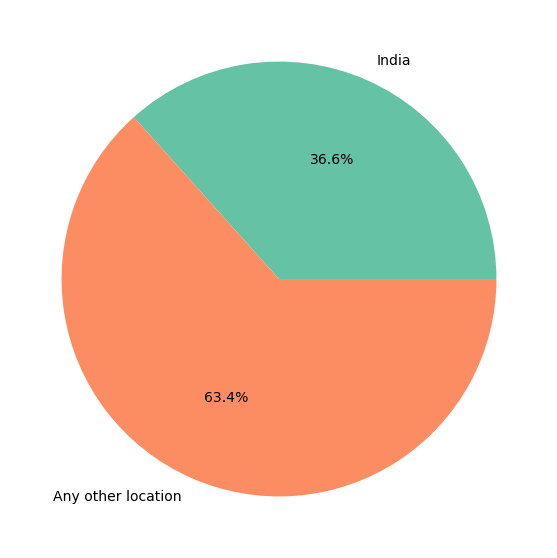

In [12]:
# Creating the dataset
data = [8792,15205]
mylabels = ["India", "Any other location"]

# Creating plot
fig = plt.figure(figsize =(12, 10))
plt.pie(data, labels = mylabels, autopct='%1.1f%%', textprops={'fontsize': 14})
 
# show plot
plt.show()

<div class="alert alert-block alert-info">
As the pie chart shows, more than a third of the participants (exactly 36%) are from India! </div>

## What kind of degree do the participants have?

<AxesSubplot:ylabel='None'>

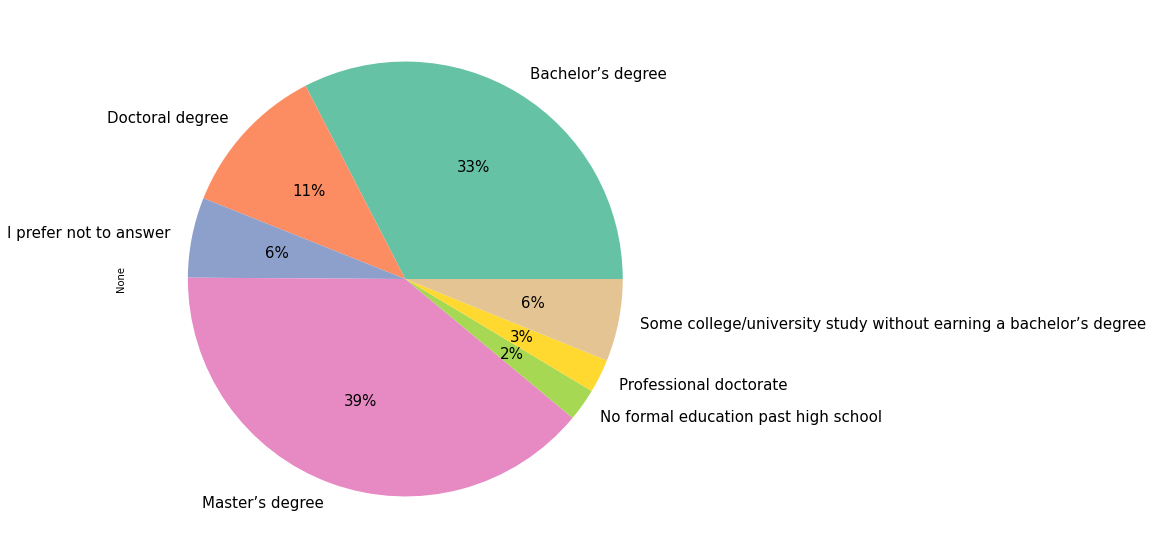

In [13]:
df.groupby('Q8').size().plot(kind='pie', textprops={'fontsize': 15}, figsize=(15, 10),  autopct='%1.0f%%')

<div class="alert alert-block alert-info">
Most of the people have Master's degree or Bachelor's degree, which is understandable, since the profession requires, among other things, statistical and mathematical knowledge.</div>

## How many years of exprerience do we have?

<AxesSubplot:ylabel='None'>

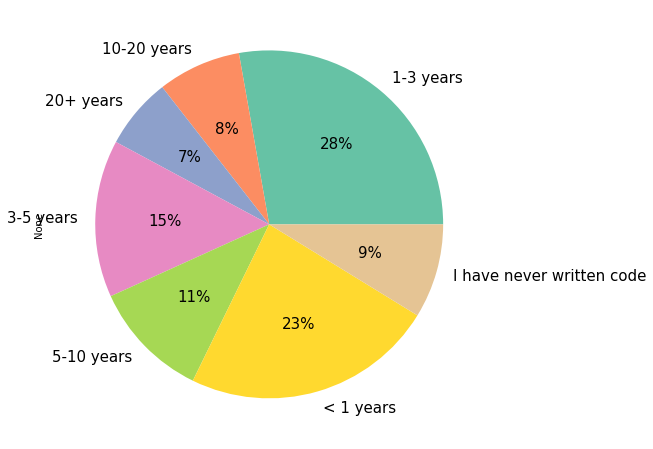

In [14]:
df.groupby('Q11').size().plot(kind='pie', textprops={'fontsize': 15}, figsize=(12, 8),  autopct='%1.0f%%')

<div class="alert alert-block alert-info">
As we can see, most of the participants are relative beginners: more than half of them have been writing codes for less than 3 years. It is in line with our previous finding that there are a lot of young people in the Data Science field.</div>

Text(0.5, 1.0, 'Current role')

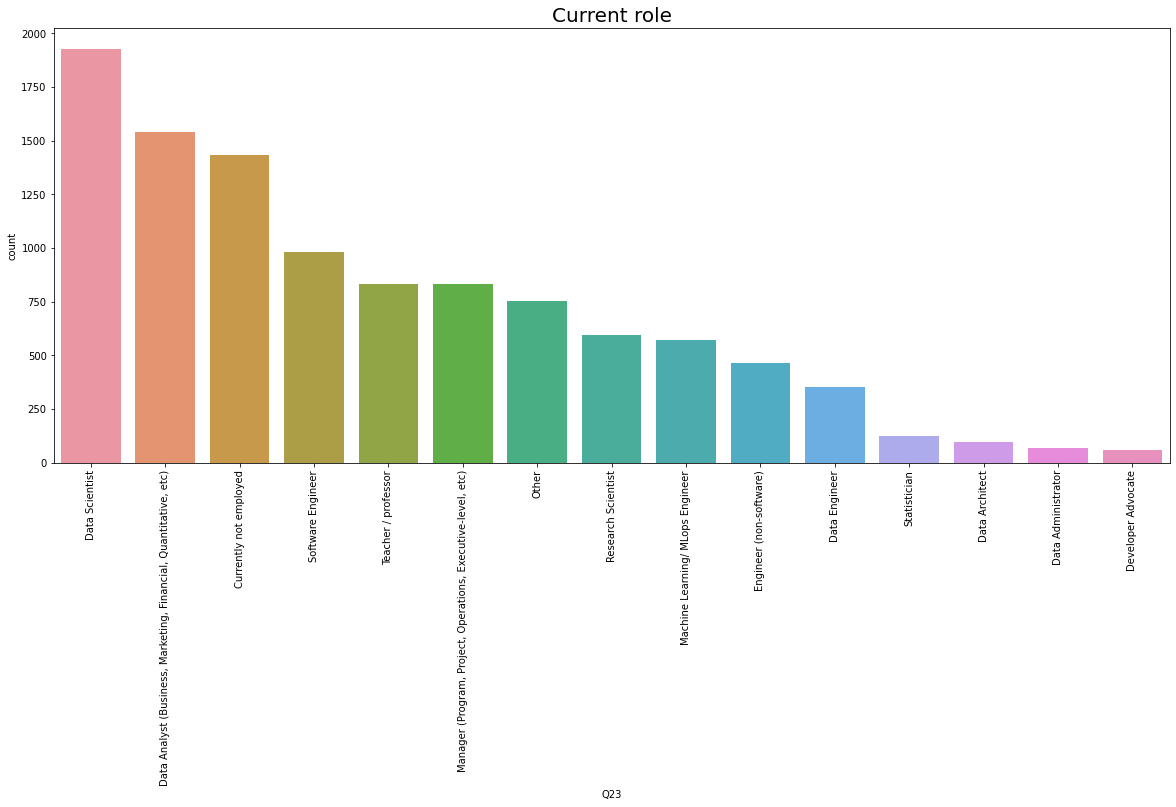

In [15]:
color_palette = sns.color_palette("Set2", 8)
sns.set_palette(color_palette)
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.countplot(x=df["Q23"], order = df['Q23'].value_counts().index)
plt.title('Current role', fontsize=20)

<div class="alert alert-block alert-info">
It's not surprising: most of the participants are Data Scientists. In second place are Data Analysts, which is understandable as well. But it is interesting that in the third place there are participants currently not employed. They must be students. It is a bit surprising for me how few Data Engineers there are (11th place). 
</div>

Text(0.5, 1.0, 'Yearly compensation')

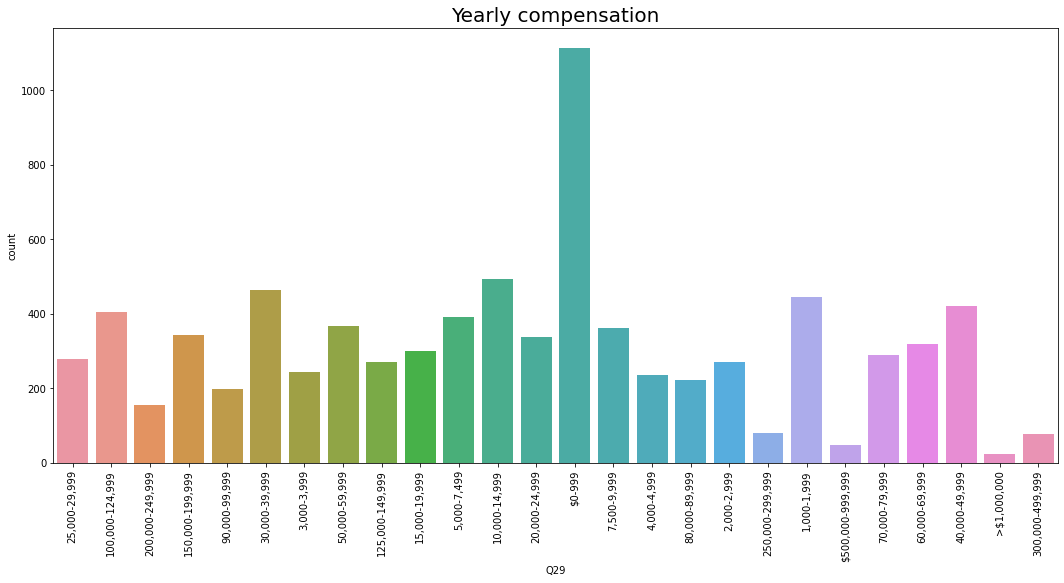

In [16]:
color_palette = sns.color_palette("Set2", 8)
sns.set_palette(color_palette)
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
sns.countplot(x=df["Q29"])
plt.title('Yearly compensation', fontsize=20)

<div class="alert alert-block alert-info">
Most of the participants earn under 999 USD/year, I believe this is because they are still students. 
</div>

In [17]:
import plotly.express as px
notebook = ['Kaggle Notebooks', 'Colab Notebooks', 'Azure Notebooks', 'Code Ocean', 'IBM Watson Studio', 'Amazon Sagemaker Studio', 'Amazon Sagemaker Studio Lab']
nb_count = [7478, 8929, 885,158, 964, 735, 545]
notebooks = pd.DataFrame({'Notebook':notebook,'Count':nb_count})
fig = px.bar(notebooks,x='Notebook',y='Count',title='<b>Which notebooks do the Kagglers use?</b>')
fig.show()

<div class="alert alert-block alert-info">
Most of the users use Colab Notebooks. I personally use that platform almost exclusively. I thin Colab is popular because it allows anybody to write and execute arbitrary python code through the browser, and is especially well suited to machine learning, data analysis and education.
</div>

import plotly.express as px


<div class="alert alert-block alert-warning">
To be continued...
</div>


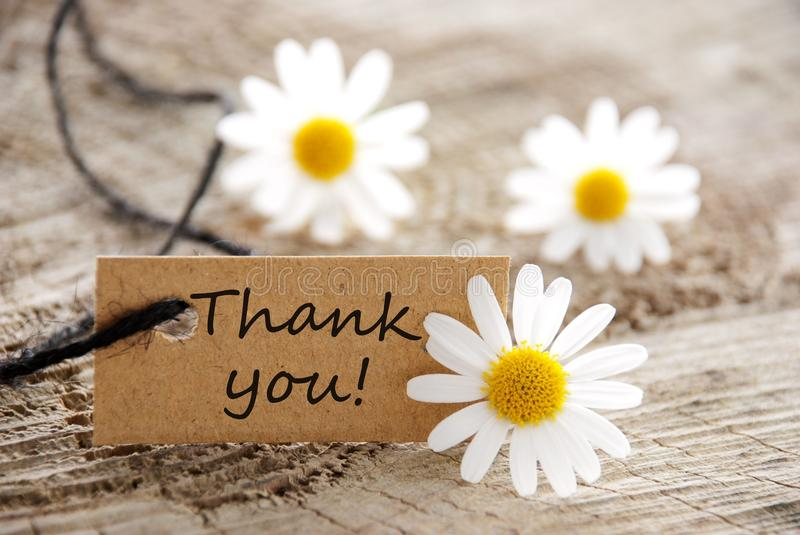